In [81]:
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import LeaveOneOut

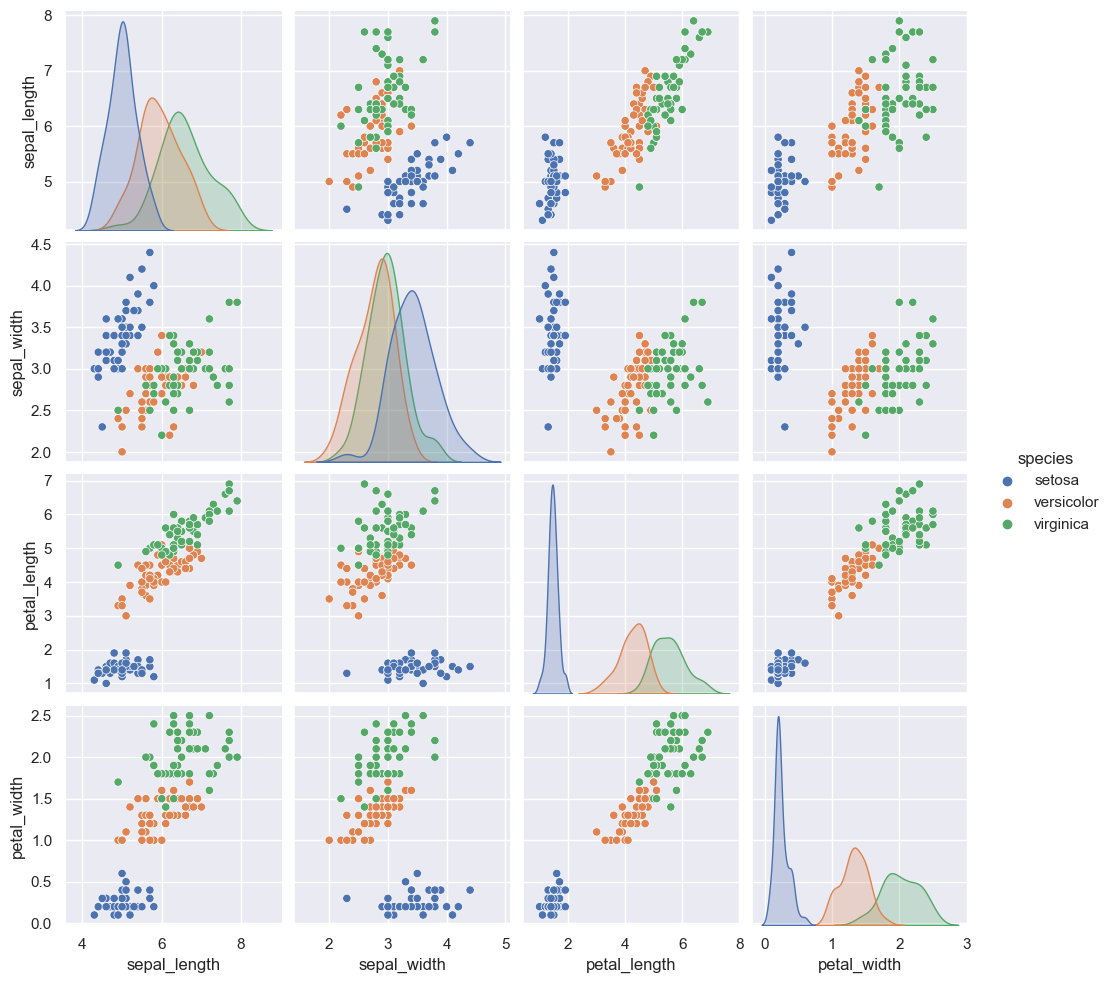

<Figure size 800x800 with 0 Axes>

In [43]:
iris = sns.load_dataset("iris")
sns.set()
sns.pairplot(iris, hue="species")
plt.figure(figsize=(8,8))
plt.show()
# print(iris.head())

In [44]:
# delete the label column dìfrom the dataset
X_iris = iris.drop("species", axis=1)

# create the list containing the labels 
y_iris = iris["species"]

# split the sataset into training set ans test set
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris)

# instantiate the model
model = GaussianNB()

# train the model
model.fit(X =Xtrain,y =ytrain)

# do the prediction 
y_pred = model.predict(Xtest)

# how well out model predict 
score = accuracy_score(ytest,y_pred)
print(score, f" Ratio of traning set: {Xtrain.shape[0]/ iris.shape[0]}")
 

0.9736842105263158  Ratio of traning set: 0.7466666666666667


## <font color=yellow> Regression

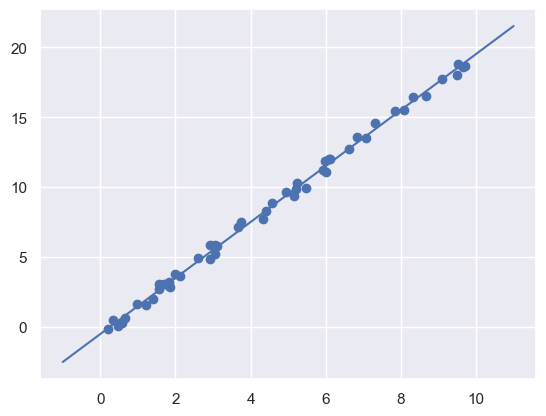

In [45]:
from sklearn.linear_model import LinearRegression

# initialize the random generator 
rng = np.random.RandomState(42) # the number in the parathesis is the bame given to the random generator 

# create fake data
x = 10* rng.rand(50)
y = 2 * x-1 + rng.rand(50)

# model instance 
model = LinearRegression(fit_intercept=True)

# create the matrix data 
X = x[:, np.newaxis]

# model training 
model.fit(X,y)

# creating test data 
x_fit = np.linspace(-1,11) # create a evenly space array starting from -1 up to 11
x_fit = x_fit[:, np.newaxis]

# predict the labels for new data
y_predic = model.predict(x_fit)

# visually see the predictions 
plt.scatter(x,y)
plt.plot(x_fit, y_predic)

#### - Model validation 

In [46]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# load the data set 
iris = load_iris()
X = iris.data
y = iris.target

# create the test and training data
X1,X2,y1,y2 = train_test_split(X, y, train_size=0.5)

# instanctiated the model 
model = KNeighborsClassifier(n_neighbors=1)

# train twice the same model 
model1 = model.fit(X1,y1)
model2 = model.fit(X2,y2)

# do the prediction 
y1_pred = model1.predict(X2)
y2_pred = model2.predict(X1)

# compute accurancy 
accuracy1 = accuracy_score(y2, y1_pred)
accuracy2 = accuracy_score(y1, y2_pred)


print(accuracy1, accuracy2)



1.0 0.96


In [47]:


accuracy = cross_val_score(model, X,y,cv=LeaveOneOut())
print(accuracy)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


## <font color=yellow> Feature Engineering 

In [48]:
from sklearn.feature_extraction import DictVectorizer

data = [{"Price House":100,"rooms": 3,"Neighborhood":"viale Ippocrate"},
        {"Price House":200,"rooms":4,"Neighborhood": "Casilina"},
        {"Price House":300,"rooms": 5,"Neighborhood":"Appia"}]

vec = DictVectorizer(dtype=int)
new_features = vec.fit_transform(data)

print(vec.get_feature_names_out())
print(new_features)

['Neighborhood=Appia' 'Neighborhood=Casilina'
 'Neighborhood=viale Ippocrate' 'Price House' 'rooms']
  (0, 2)	1
  (0, 3)	100
  (0, 4)	3
  (1, 1)	1
  (1, 3)	200
  (1, 4)	4
  (2, 0)	1
  (2, 3)	300
  (2, 4)	5


In [49]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
import pandas as pd 

data = ["problem of evil","evil queen","horizon problem"]

vec = CountVectorizer()
X = vec.fit_transform(data)

# convert the vectorized data in pandas data frame 
vis_data = pd.DataFrame(X.toarray(),columns=vec.get_feature_names_out()) # type of the tables , are equavalent as arrays 

# TF-IDF = term frequency - inverse document frequency 
vec2 = TfidfVectorizer()
X2 = vec2.fit_transform(data)
vis2_data = pd.DataFrame(X2.toarray(),columns=vec2.get_feature_names_out())
print(vis_data,"\n", vis2_data,"\n" ,X)

   evil  horizon  of  problem  queen
0     1        0   1        1      0
1     1        0   0        0      1
2     0        1   0        1      0 
        evil   horizon        of   problem     queen
0  0.517856  0.000000  0.680919  0.517856  0.000000
1  0.605349  0.000000  0.000000  0.000000  0.795961
2  0.000000  0.795961  0.000000  0.605349  0.000000 
   (0, 3)	1
  (0, 2)	1
  (0, 0)	1
  (1, 0)	1
  (1, 4)	1
  (2, 3)	1
  (2, 1)	1


## <font color=yellow> Derivative Features 

[[  1.   1.   1.   1.]
 [  1.   2.   4.   8.]
 [  1.   3.   9.  27.]
 [  1.   4.  16.  64.]
 [  1.   5.  25. 125.]] 
 [[1.]
 [2.]
 [3.]
 [4.]
 [5.]]


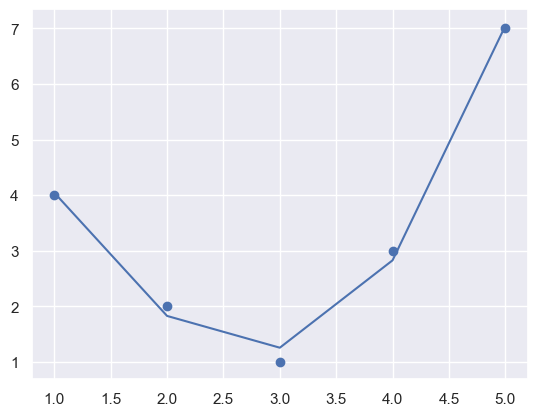

In [50]:
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# create the data 
x = np.array([1.,2,3,4,5])
y = np.array([4,2,1,3,7])


# convert the data in a matrix 
X = x[:, np.newaxis]

# enhance features
poly = PolynomialFeatures(degree=3) # with degree 3 we mean that we have 3 regressors X having up to 3 polynomial 
X2 = poly.fit_transform(X)
print(X2,"\n",X)

model =LinearRegression().fit(X2,y)
y_pred = model.predict(X2)



plt.scatter(x,y)
plt.plot(x, y_pred)

#### - Data Miss

In [51]:
from numpy import nan 
from sklearn.impute import SimpleImputer

X = np.array([
    [nan,0,3],
    [3,5,2],
    [7,9,nan]]
)
y = np.array([14,16,8])

imputer = SimpleImputer(strategy="mean") # it will fill the missing values with the mean with respect to the colums values 
X2 = imputer.fit_transform(X)

print(X2)


[[5.  0.  3. ]
 [3.  5.  2. ]
 [7.  9.  2.5]]


In [76]:
# import the dataset 
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
import seaborn as sns

# print(data.target_names) # lables are the topics of the discussion of this news 

# pick a subset of categories 
categories = ['talk.politics.mideast','sci.space','rec.autos']

# load the data 
train = fetch_20newsgroups(subset="train", categories=categories) # the train is compose of the data and lebles of the data
test = fetch_20newsgroups(subset="test", categories=categories)

# print a sample of the dataset 
#print(train.data[5])

# create the model 
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# train the model 
model.fit(train.data, train.target) # we are passing first the data and then the corresponding lables 
lables= model.predict(test.data) # we only pass the data because we don't need the lables given that we are trying to predict 

# create the cofussion matrix 
mat = confusion_matrix(test.target,lables)

# plot the cofussion matrix
# sns.heatmap(mat.T, square=True, annot=True, fmt="d", cbar=False , xticklabels=train.target_names, yticklabels=train.target_names) # fmt it means we want numbers plotted 
# plt.xlabel("True label")
# plt.ylabel("Predicted labels")
# plt.show()

# try the classifier with our text 
s = "invasion"
pred = model.predict([s])
print(train.target_names[pred[0]])


talk.politics.mideast


## <font color="yellow"> Support Vector Machine (SVM)

/Users/danielguarnizo/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


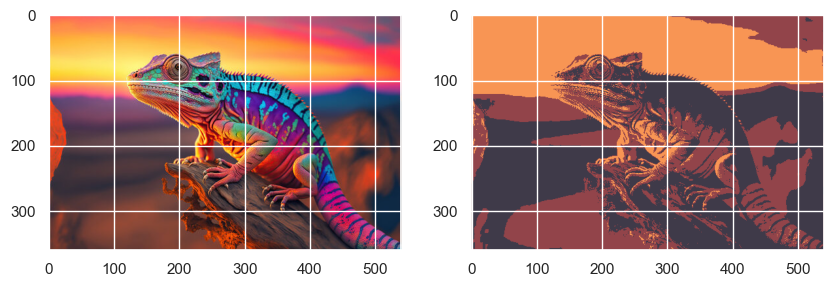

In [82]:
import matplotlib.image as img 
import cv2
from sklearn.cluster import KMeans 

# load the image 
img = cv2.imread("images/camaleon.jpeg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# get image data
(h,w,c) = img.shape

# convert the image from a 3d shape to a 2d shape 
img2D = img.reshape(h*w,c)

# intiatiate kmeans with the number of color that we want 
kmeans_model = KMeans(n_clusters=3)

# map the colors
cluster_labels = kmeans_model.fit_predict(img2D)# cluster algorithms work withh fit and at the same time predict 

# convert point coordinates to good pixel values 
rgb_color = kmeans_model.cluster_centers_.round(0).astype(int)

# get back the 3d shape image
img_quant = np.reshape(rgb_color[cluster_labels],(h,w,c))
img_quant = img_quant.astype("uint8")

plt.figure(figsize=(10,10))
plt.subplot(1,2,1); plt.imshow(img)
plt.subplot(1,2,2);plt.imshow(img_quant)


In [ ]:
CUdnn 